In [1]:
import time
print(time.ctime())
nb_start_time = time.time()

import os
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sun Mar 27 23:05:40 2022
Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
path = "../../../Codes/Deep Learning Advanced NLP and RNNs 2018-11/3. Bidirectional RNNs/digit-recognizer/"

In [3]:
def get_mnist(limit=None):
    if not os.path.exists(path):
        # os.path.exists takes only the relative path
        return
        print("Folder containing images data does not exist")
        if not os.path.exists(path+"train.csv"):
            print("Folder exists but not the data")
            return
        
    file = open(path+"train.csv")
        
    print("reading in and transforming data")
    df = pd.read_csv(path+'train.csv') # There are 42k records with one label and 784 pixels as 0, 1
    data = df.values #.values make it a numpy array
    np.random.shuffle(data)
    X = data[:, 1:].reshape(-1, 28, 28)/255.0 #scale from 0 to 1. Shape now becomes (42000, 28, 28)
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


In [4]:
X, Y = get_mnist()

reading in and transforming data


In [5]:
# config
D = 28
M = 15

In [6]:
input_ = Input(shape=(D, D))

rnn1 = Bidirectional(LSTM(M, return_sequences=True)) 
x1 = rnn1(input_) # output is N x D x 2M
x1 = GlobalMaxPooling1D()(x1) # N x 2M

#left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))

#customer-layer
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

x2 = permutor(input_)
x2 = rnn2(x2) # output is N x D x 2M
x2 = GlobalMaxPooling1D()(x2) # output is N x 2M


Metal device set to: Apple M1


2022-03-27 23:05:43.726713: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-27 23:05:43.726811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2]) # output is N x 4M

# final dense layer
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_, outputs=output)

In [8]:
# testing
o = model.predict(X)
print("o.shape:", o.shape)

2022-03-27 23:05:44.129330: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-27 23:05:44.129487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 23:05:48.983638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:05:49.042816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:05:49.042840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:05:49.049725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:05:49.049774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:11

o.shape: (42000, 10)


In [9]:
# compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# train
print('Training model...')
r = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)

Training model...
Epoch 1/10


2022-03-27 23:06:17.538290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.726489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.728388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.736139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.737867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.928872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:17.942310: I tensorflow/core/grappler/optimizers/cust

919/919 [==============================] - ETA: 0s - loss: 1.3380 - accuracy: 0.6205

2022-03-27 23:06:59.457909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:59.527417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:59.529095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:59.534279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-27 23:06:59.535913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


919/919 [==============================] - 56s 54ms/step - loss: 1.3374 - accuracy: 0.6207 - val_loss: 0.3192 - val_accuracy: 0.9157
Epoch 2/10
919/919 [==============================] - 48s 53ms/step - loss: 0.2834 - accuracy: 0.9237 - val_loss: 0.2053 - val_accuracy: 0.9421
Epoch 3/10
919/919 [==============================] - 49s 53ms/step - loss: 0.1918 - accuracy: 0.9446 - val_loss: 0.1649 - val_accuracy: 0.9504
Epoch 4/10
919/919 [==============================] - 49s 54ms/step - loss: 0.1490 - accuracy: 0.9569 - val_loss: 0.1402 - val_accuracy: 0.9578
Epoch 5/10
919/919 [==============================] - 50s 54ms/step - loss: 0.1240 - accuracy: 0.9627 - val_loss: 0.1264 - val_accuracy: 0.9617
Epoch 6/10
919/919 [==============================] - 49s 53ms/step - loss: 0.1040 - accuracy: 0.9688 - val_loss: 0.1167 - val_accuracy: 0.9641
Epoch 7/10
919/919 [==============================] - 49s 53ms/step - loss: 0.0935 - accuracy: 0.9733 - val_loss: 0.1045 - val_accuracy: 0.9687
Epo

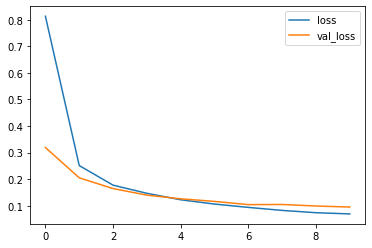

In [11]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

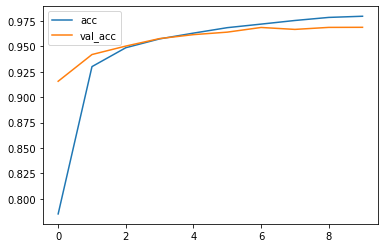

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [13]:
print(f"{(time.time()-nb_start_time)/60:.2f} mins")

8.79 mins
